19 gennaio 2023
azimuth parabola: 85

azimuth vero: 80

ora inizio parabola: 00:00

ora fine parabola: 02:56

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

In [80]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 00:30:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 00:36:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 20 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

In [81]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [82]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [83]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [84]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [85]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [86]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [87]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

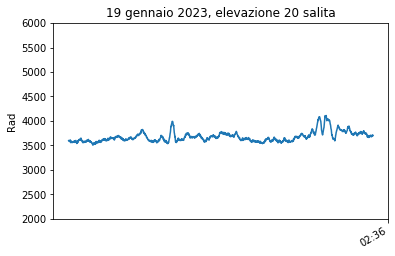

In [88]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [89]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [112]:
with open('dati20s.txt', 'w') as f:
    file1 = df.to_string(index=False)
    f.write(file1)


In [101]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:06:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:08:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 25 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

In [102]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [103]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)


In [104]:
while parabola.at[0,'elevazione'] > 25.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [105]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [106]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [107]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

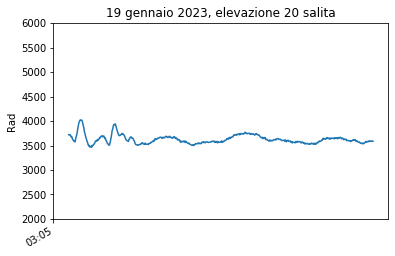

In [108]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [109]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [113]:
with open('dati25s.txt', 'w') as f:
    file2 = df.to_string(index=False)
    f.write(file2)


In [117]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:12:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:14:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 30 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 30.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

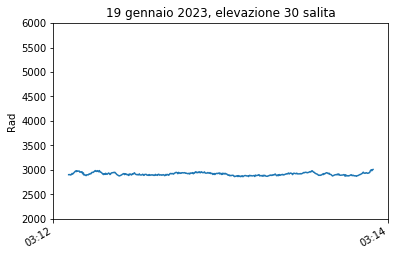

In [118]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [119]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [120]:
with open('dati30s.txt', 'w') as f:
    file3 = df.to_string(index=False)
    f.write(file3)


In [121]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:22:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:23:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 35 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 35.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

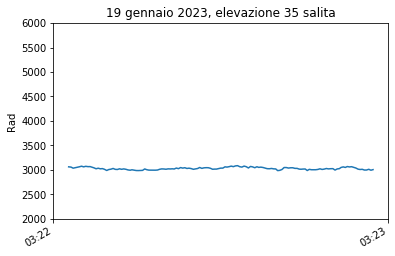

In [122]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [ ]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [ ]:
with open('dati35s.txt', 'w') as f:
    file4 = df.to_string(index=False)
    f.write(file4)


In [123]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:31:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:32:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 40 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 40.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

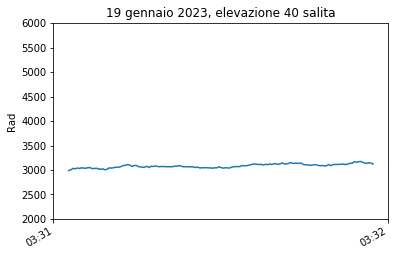

In [124]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [127]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [129]:
with open('dati40s.txt', 'w') as f:
    file5 = df.to_string(index=False)
    f.write(file5)
       

In [ ]:
azimuth_min =  84.9
azimuth_max = 85.1

data_i = pd.to_datetime('2023-01-19 01:37:30', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-01-19 01:38:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-01-19 03:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '19 gennaio 2023, elevazione 45 salita'

file_parabola = '../../Dati/19 gennaio/2023_01_19.txt'
file_ricevitore = '../../Dati/19 gennaio/2023-01-18_19.txt'

parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                             names=['data','ora','rad','temperatura'])

parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

while parabola.at[0,'elevazione'] > 45.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)
    

ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]    


delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

In [ ]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))
ax.set_ylim((2000,6000))

plt.title(title)
plt.ylabel('Rad')
plt.show()

In [ ]:
df = pd.DataFrame(columns=['data_ora','rad','temperatura','elevazione'])

for i in range (20, 56, 5):
    mask_11 = parabola.elevazione >= i - 0.1
    mask_12 = parabola.elevazione <= i + 0.1
    mask_13 = parabola.data_ora <= data_m 
    a = parabola[mask_11 & mask_12 & mask_13]
    if a.empty == False:
        mask_7 = ricevitore_10.data_ora >= a.iloc[0]['data_ora'] 
        mask_8 = ricevitore_10.data_ora <= a.iloc[-1]['data_ora'] 
        b = ricevitore_10[mask_7 & mask_8].assign(elevazione = i)
        df = pd.concat([df,b])

for j in range (50, 19, -5):
    mask_14 = parabola.elevazione >= j - 0.1
    mask_15 = parabola.elevazione <= j + 0.1
    mask_16 = parabola.data_ora >= data_m 
    c = parabola[mask_14 & mask_15 & mask_16]
    if c.empty == False:
        mask_9 = ricevitore_10.data_ora >= c.iloc[0]['data_ora'] 
        mask_10 = ricevitore_10.data_ora <= c.iloc[-1]['data_ora'] 
        d = ricevitore_10[mask_9 & mask_10].assign(elevazione = j)
        df = pd.concat([df,d])

In [130]:
with open('dati45s.txt', 'w') as f:
    file6 = df.to_string(index=False)
    f.write(file6)